In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-supply-chain-disruption-and-resilience/global_supply_chain_disruption_v1.csv


## **DATA READING**

In [187]:
df = pd.read_csv('/kaggle/input/global-supply-chain-disruption-and-resilience/global_supply_chain_disruption_v1.csv')

In [188]:
df.head(n=10)

,Order_ID,Order_Date,Origin_City,Destination_City,Route_Type,Transportation_Mode,Product_Category,Base_Lead_Time_Days,Scheduled_Lead_Time_Days,Actual_Lead_Time_Days,Delay_Days,Delivery_Status,Disruption_Event,Geopolitical_Risk_Index,Weather_Severity_Index,Inflation_Rate_Pct,Shipping_Cost_USD,Order_Weight_Kg,Mitigation_Action_Taken
0,ORD-00BCB25B,2024-04-05,"Shanghai, CN","Los Angeles, US",Pacific,Sea,Textiles,18,21,18,0,On Time,NaN,0.81,8.9,1.83,1611.81,1781,Standard Shipping
1,ORD-EBDBACB7,2024-09-08,"Tokyo, JP","Singapore, SG",Intra-Asia,Air,Pharmaceuticals,2,5,2,0,On Time,NaN,0.70,5.9,2.44,76127.70,8142,Standard Shipping
2,ORD-4052DA06,2025-01-28,"Shenzhen, CN","Rotterdam, NL",Suez,Air,Semiconductors,3,4,4,0,On Time,NaN,0.46,8.1,3.86,13699.18,1706,Standard Shipping
3,ORD-03F41ABB,2025-02-04,"Santos, BR","Shanghai, CN",Commodity,Sea,Consumer Electronics,35,36,35,0,On Time,NaN,0.88,9.3,1.58,5448.24,5796,Standard Shipping
4,ORD-347A88A6,2025-05-20,"Hamburg, DE","New York, US",Atlantic,Sea,Raw Materials,12,13,12,0,On Time,NaN,0.55,2.9,3.12,1215.98,1569,Standard Shipping
5,ORD-113CD5AB,2025-11-01,"Hamburg, DE","New York, US",Atlantic,Sea,Auto Parts,12,15,12,0,On Time,NaN,0.12,7.1,2.77,2890.72,5162,Standard Shipping
6,ORD-2A8EE4EE,2024-03-23,"Mumbai, IN","Felixstowe, UK",Suez,Sea,Consumer Electronics,24,26,23,0,On Time,NaN,0.50,1.2,4.59,6888.00,9184,Standard Shipping
7,ORD-C6B65B99,2025-11-20,"Tokyo, JP","Singapore, SG",Intra-Asia,Sea,Perishable Foods,7,10,7,0,On Time,NaN,0.83,2.6,3.77,6060.05,6623,Standard Shipping
8,ORD-A5C7A8D7,2024-06-25,"Hamburg, DE","New York, US",Atlantic,Sea,Pharmaceuticals,12,15,18,3,Late,Port Congestion,0.74,5.8,2.96,12325.20,8586,Expedited Air Freight
9,ORD-B5E7E96D,2025-11-29,"Shenzhen, CN","Rotterdam, NL",Suez,Sea,Perishable Foods,28,31,27,0,On Time,NaN,0.67,4.3,4.32,1486.30,1780,Standard Shipping


In [189]:
df.tail(n=10)

,Order_ID,Order_Date,Origin_City,Destination_City,Route_Type,Transportation_Mode,Product_Category,Base_Lead_Time_Days,Scheduled_Lead_Time_Days,Actual_Lead_Time_Days,Delay_Days,Delivery_Status,Disruption_Event,Geopolitical_Risk_Index,Weather_Severity_Index,Inflation_Rate_Pct,Shipping_Cost_USD,Order_Weight_Kg,Mitigation_Action_Taken
9990,ORD-999DE992,2025-06-02,"Shenzhen, CN","Rotterdam, NL",Suez,Air,Pharmaceuticals,3,4,3,0,On Time,NaN,0.86,7.4,4.83,65451.54,6398,Standard Shipping
9991,ORD-0EE68E1E,2024-02-21,"Shanghai, CN","Los Angeles, US",Pacific,Air,Pharmaceuticals,2,3,2,0,On Time,NaN,0.36,6.8,1.68,23285.24,3113,Standard Shipping
9992,ORD-FA0B7D11,2024-12-04,"Shanghai, CN","Los Angeles, US",Pacific,Sea,Consumer Electronics,18,21,24,3,Late,Port Congestion,0.78,4.9,2.99,5392.33,5508,Standard Shipping
9993,ORD-29A58CFA,2024-05-18,"Tokyo, JP","Singapore, SG",Intra-Asia,Sea,Perishable Foods,7,10,10,0,On Time,Port Congestion,0.25,5.4,-0.28,2824.93,4109,Standard Shipping
9994,ORD-D416E1C3,2024-02-01,"Shenzhen, CN","Rotterdam, NL",Suez,Sea,Auto Parts,28,31,28,0,On Time,NaN,0.24,9.9,2.44,1793.04,2892,Standard Shipping
9995,ORD-525E3FA5,2024-10-14,"Tokyo, JP","Singapore, SG",Intra-Asia,Sea,Consumer Electronics,7,8,8,0,On Time,NaN,0.58,8.1,3.38,7346.21,9299,Standard Shipping
9996,ORD-5E9DBD46,2024-09-10,"Tokyo, JP","Singapore, SG",Intra-Asia,Sea,Textiles,7,10,7,0,On Time,NaN,0.37,5.5,2.34,4112.06,6003,Standard Shipping
9997,ORD-E6949429,2024-07-13,"Hamburg, DE","New York, US",Atlantic,Sea,Raw Materials,12,13,12,0,On Time,NaN,0.84,1.0,4.56,7346.20,7985,Standard Shipping
9998,ORD-29B9A2DA,2024-07-21,"Mumbai, IN","Felixstowe, UK",Suez,Sea,Semiconductors,24,27,25,0,On Time,NaN,0.53,4.7,1.05,5810.94,7596,Standard Shipping
9999,ORD-DAEE9CDE,2025-09-02,"Hamburg, DE","New York, US",Atlantic,Sea,Consumer Electronics,12,14,12,0,On Time,NaN,0.78,3.3,5.17,5926.51,6659,Standard Shipping


## **DATA EXPLORATION**

In [190]:
df.shape

(10000, 19)

In [191]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [192]:
df.columns.tolist()

['Order_ID',
 'Order_Date',
 'Origin_City',
 'Destination_City',
 'Route_Type',
 'Transportation_Mode',
 'Product_Category',
 'Base_Lead_Time_Days',
 'Scheduled_Lead_Time_Days',
 'Actual_Lead_Time_Days',
 'Delay_Days',
 'Delivery_Status',
 'Disruption_Event',
 'Geopolitical_Risk_Index',
 'Weather_Severity_Index',
 'Inflation_Rate_Pct',
 'Shipping_Cost_USD',
 'Order_Weight_Kg',
 'Mitigation_Action_Taken']

In [193]:
# Check for all Order_ID values being unique
df['Order_ID'].duplicated().any()


np.False_

In [194]:
# Inspecting for NULL values
df.isnull().sum()

Order_ID                       0
Order_Date                     0
Origin_City                    0
Destination_City               0
Route_Type                     0
Transportation_Mode            0
Product_Category               0
Base_Lead_Time_Days            0
Scheduled_Lead_Time_Days       0
Actual_Lead_Time_Days          0
Delay_Days                     0
Delivery_Status                0
Disruption_Event            8733
Geopolitical_Risk_Index        0
Weather_Severity_Index         0
Inflation_Rate_Pct             0
Shipping_Cost_USD              0
Order_Weight_Kg                0
Mitigation_Action_Taken        0
dtype: int64

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  10000 non-null  object 
 1   Order_Date                10000 non-null  object 
 2   Origin_City               10000 non-null  object 
 3   Destination_City          10000 non-null  object 
 4   Route_Type                10000 non-null  object 
 5   Transportation_Mode       10000 non-null  object 
 6   Product_Category          10000 non-null  object 
 7   Base_Lead_Time_Days       10000 non-null  int64  
 8   Scheduled_Lead_Time_Days  10000 non-null  int64  
 9   Actual_Lead_Time_Days     10000 non-null  int64  
 10  Delay_Days                10000 non-null  int64  
 11  Delivery_Status           10000 non-null  object 
 12  Disruption_Event          1267 non-null   object 
 13  Geopolitical_Risk_Index   10000 non-null  float64
 14  Weather

In [196]:
# convert Order_date to datetime dtype

df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='mixed', dayfirst=True)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  10000 non-null  object        
 1   Order_Date                10000 non-null  datetime64[ns]
 2   Origin_City               10000 non-null  object        
 3   Destination_City          10000 non-null  object        
 4   Route_Type                10000 non-null  object        
 5   Transportation_Mode       10000 non-null  object        
 6   Product_Category          10000 non-null  object        
 7   Base_Lead_Time_Days       10000 non-null  int64         
 8   Scheduled_Lead_Time_Days  10000 non-null  int64         
 9   Actual_Lead_Time_Days     10000 non-null  int64         
 10  Delay_Days                10000 non-null  int64         
 11  Delivery_Status           10000 non-null  object        
 12  Disruption_Event   

In [198]:
# Replace NULL values in Disruption_Event column
df['Disruption_Event'] = df['Disruption_Event'].fillna('No Disruption')

In [199]:
df.isnull().sum()

Order_ID                    0
Order_Date                  0
Origin_City                 0
Destination_City            0
Route_Type                  0
Transportation_Mode         0
Product_Category            0
Base_Lead_Time_Days         0
Scheduled_Lead_Time_Days    0
Actual_Lead_Time_Days       0
Delay_Days                  0
Delivery_Status             0
Disruption_Event            0
Geopolitical_Risk_Index     0
Weather_Severity_Index      0
Inflation_Rate_Pct          0
Shipping_Cost_USD           0
Order_Weight_Kg             0
Mitigation_Action_Taken     0
dtype: int64

In [200]:
print("DATASET NUMERICAL SUMMARY")
print("=" * 50)

df.describe().round(2)

DATASET NUMERICAL SUMMARY


,Order_Date,Base_Lead_Time_Days,Scheduled_Lead_Time_Days,Actual_Lead_Time_Days,Delay_Days,Geopolitical_Risk_Index,Weather_Severity_Index,Inflation_Rate_Pct,Shipping_Cost_USD,Order_Weight_Kg
count,10000,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2024-12-29 13:37:20.639999744,17.51,19.50,18.70,0.95,0.50,4.98,3.52,11437.92,5033.73
min,2024-01-04 00:00:00,2.00,3.00,1.00,0.00,0.10,0.00,-1.15,59.94,101.00
25%,2024-07-01 00:00:00,7.00,9.00,7.00,0.00,0.30,2.50,2.70,2308.39,2590.50
50%,2024-12-27 00:00:00,18.00,20.00,18.00,0.00,0.50,4.90,3.50,4520.17,5044.50
75%,2025-07-01 00:00:00,28.00,29.00,28.00,0.00,0.69,7.50,4.35,7055.11,7493.00
max,2026-01-03 00:00:00,35.00,38.00,49.00,20.00,0.90,10.00,7.92,206814.29,9999.00
std,NaN,10.90,10.93,11.66,3.12,0.23,2.88,1.21,21086.69,2831.00


## **EDA**

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

### **FREQUENCY DISTRIBUTIONS**

*Using a **frequency** distribution is particularly effective for analyzing lead time and delay data because it balances raw counts with a normalised view, a simplified approach for non-technical stakeholders to interpret.*

- Easier Comparisons
- Identify Trends
- Swifter Practical Decision Making (Resource Allocation, Predicting Future Performances etc.)

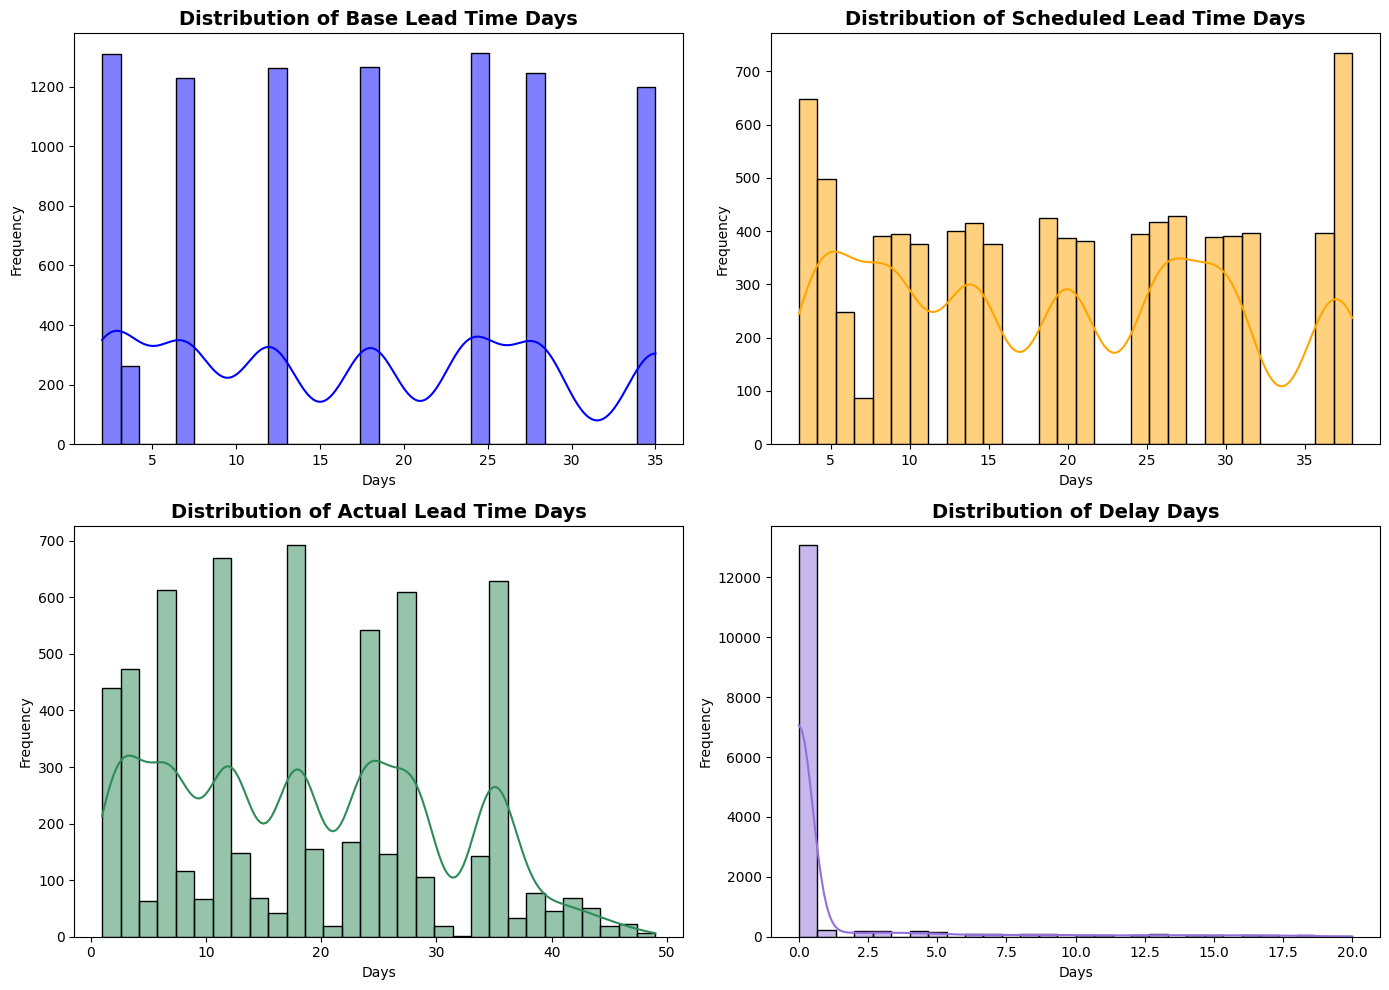

In [202]:
day_columns = ['Base_Lead_Time_Days', 'Scheduled_Lead_Time_Days', 'Actual_Lead_Time_Days', 'Delay_Days']

# Create a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14,10))
axs = axs.flatten()  # Flatten the 2D array into 1D for easy iteration

# Create colour pattern for graphs 
colours = ['blue', 'orange', 'seagreen', 'mediumpurple']

# Use enumerate to get both index and column name
for i, col in enumerate(day_columns):
    sns.histplot(
        data=df, 
        x=col,              # Use the column name string
        stat="frequency",
        bins=30,
        kde=True,
        color=colours[i],   # Reference colour grouping in histplot params
        ax=axs[i]           # Use the flattened axs array
    )
    
    axs[i].set_title(f'Distribution of {col.replace("_", " ")}', fontweight='bold', fontsize=14)
    axs[i].set_xlabel("Days")
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

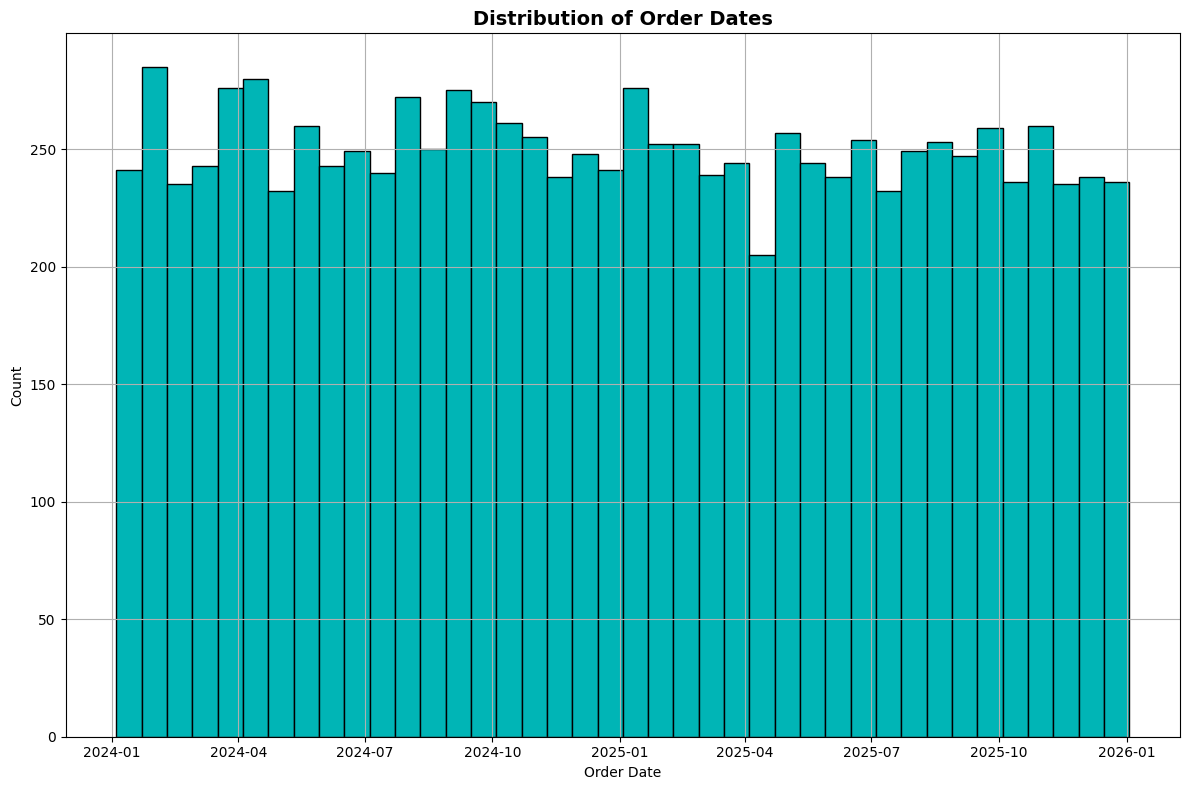

In [203]:
df['Order_Date'].hist(edgecolor='black', bins=40, figsize=(12,8), color="#00B5B6")

plt.title("Distribution of Order Dates", fontweight='bold', fontsize=14)
plt.ylabel("Count")
plt.xlabel("Order Date")
plt.tight_layout()
plt.show()

### **DELIVERY ANALYSIS**

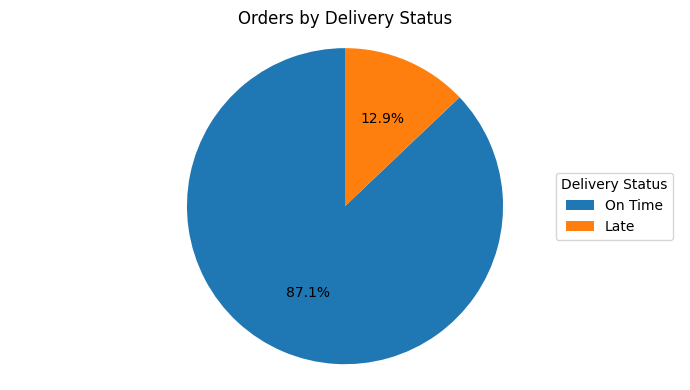

In [204]:
plt.figure(figsize=(7, 4))
delivery_status = df['Delivery_Status'].value_counts()
plt.pie(
    delivery_status,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab10.colors
)
plt.title('Orders by Delivery Status')
plt.axis('equal')
plt.legend(delivery_status.index,
          title="Delivery Status",
          loc='center right')
plt.tight_layout()
plt.show()

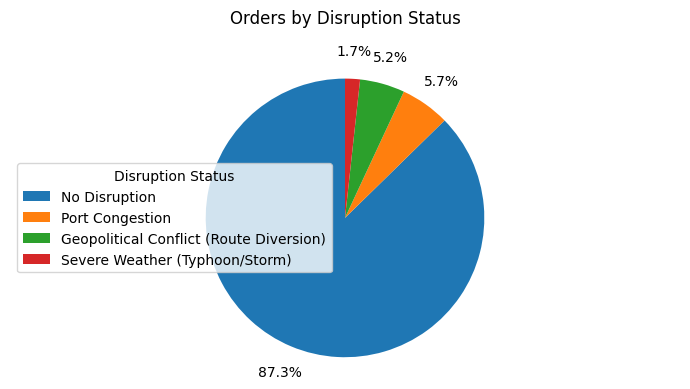

In [205]:
plt.figure(figsize=(7, 4))
disruption_status = df['Disruption_Event'].value_counts()
plt.pie(
    disruption_status,
    autopct='%1.1f%%',
    pctdistance=1.2,
    startangle=90,
    colors=plt.cm.tab10.colors
)
plt.title('Orders by Disruption Status', pad=30)
plt.axis('equal')
plt.legend(disruption_status.index,
          title="Disruption Status",
          loc='best')
plt.tight_layout()
plt.show()

In [206]:
# Filter rows where delivery status is 'late delivery'
late_deliveries = df[df['Delivery_Status'] == 'Late']

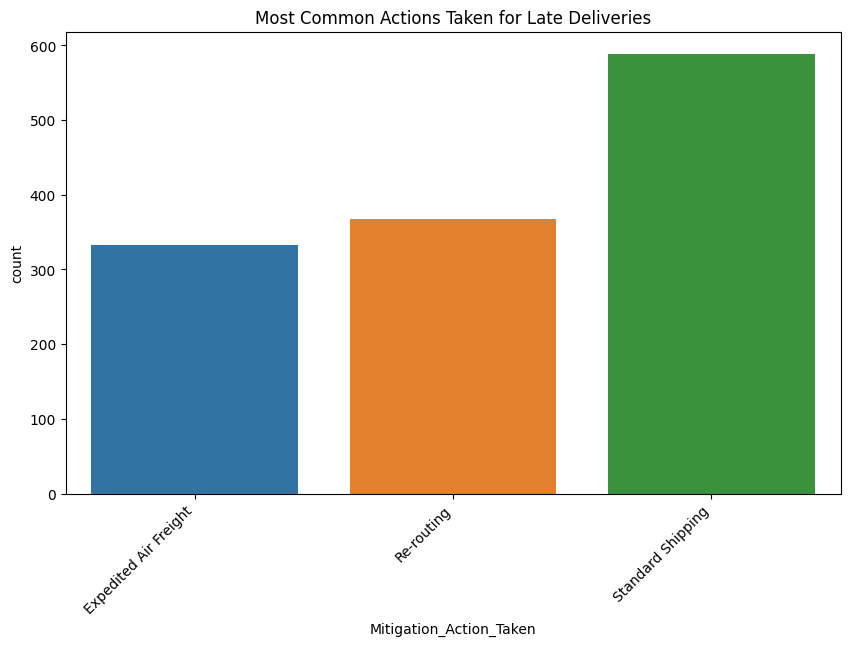

In [259]:
plt.figure(figsize=(10, 6))
sns.countplot(data=late_deliveries, x='Mitigation_Action_Taken', palette="tab10")
plt.title('Most Common Actions Taken for Late Deliveries')
plt.xticks(rotation=45, ha='right') 
plt.show()

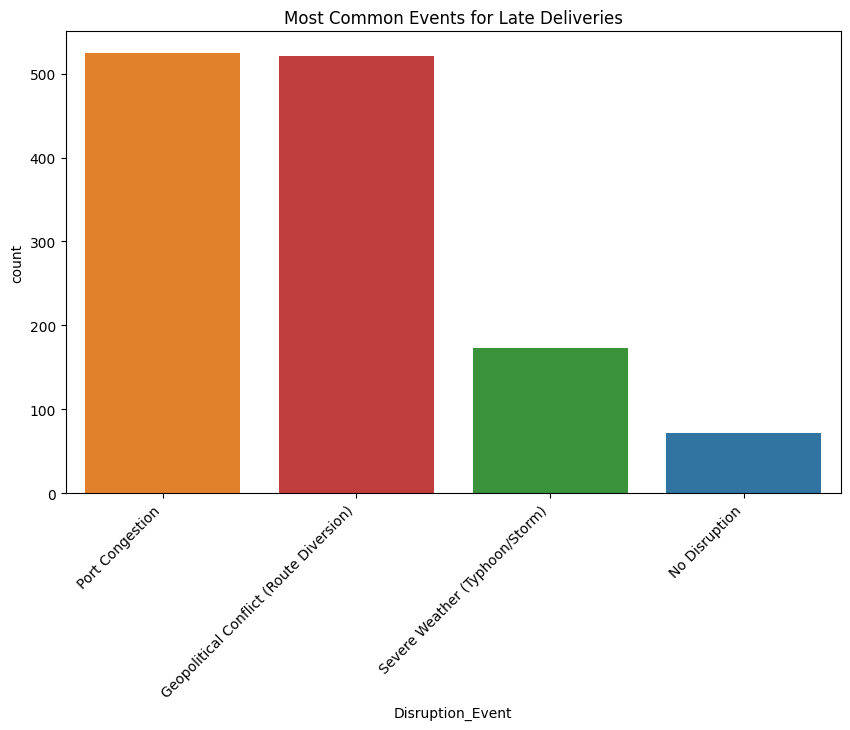

In [258]:
plt.figure(figsize=(10, 6))
sns.countplot(data=late_deliveries, x='Disruption_Event', palette=['tab:orange', 'tab:red', 'tab:green', 'tab:blue'] )
plt.title('Most Common Events for Late Deliveries')
plt.xticks(rotation=45, ha='right') 
plt.show()

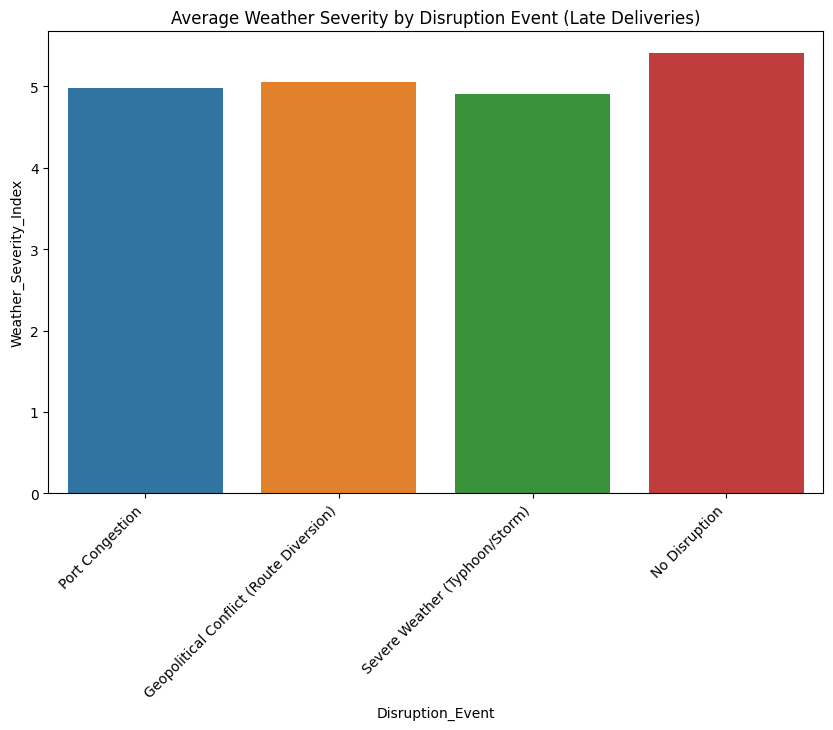

In [260]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=late_deliveries,
    palette="tab10",
    x='Disruption_Event', 
    y='Weather_Severity_Index', 
    errorbar=None # Optional: removes confidence interval lines
)

plt.title('Average Weather Severity by Disruption Event (Late Deliveries)')
plt.xticks(rotation=45, ha='right')
plt.show()


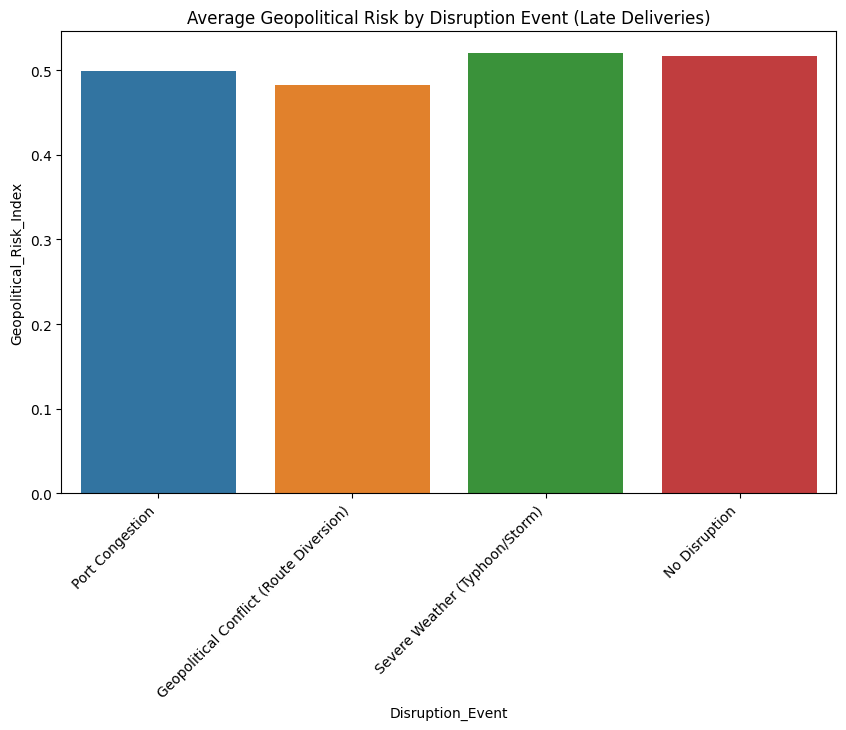

In [261]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=late_deliveries,
    palette="tab10",
    x='Disruption_Event', 
    y='Geopolitical_Risk_Index', 
    errorbar=None # Optional: removes confidence interval lines
)

plt.title('Average Geopolitical Risk by Disruption Event (Late Deliveries)')
plt.xticks(rotation=45, ha='right')
plt.show()

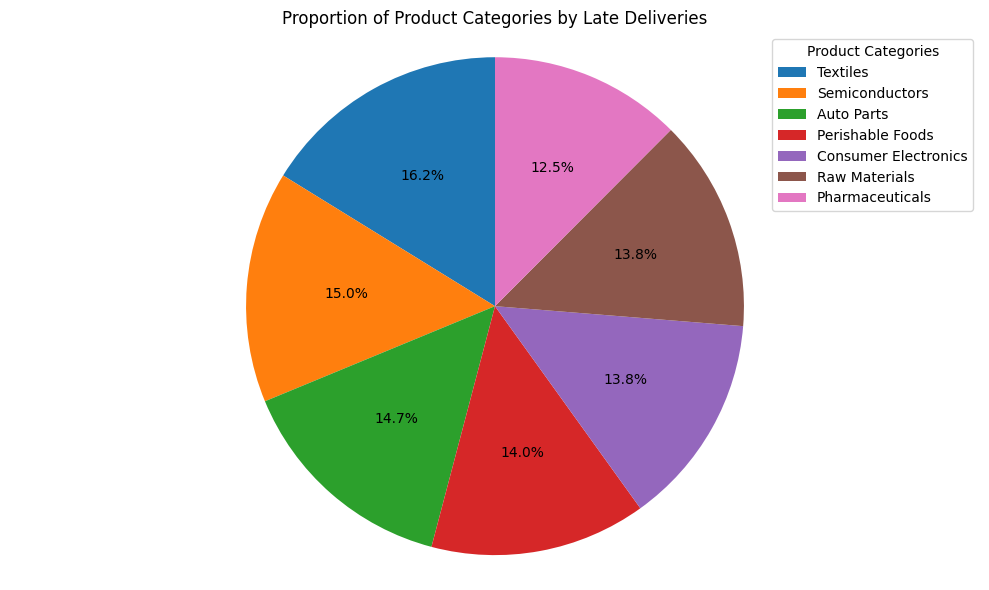

In [211]:
# How Product Category affects Delivery
late_products = late_deliveries['Product_Category'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(
    late_products,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab10.colors
)
plt.title('Proportion of Product Categories by Late Deliveries')
plt.axis('equal')
plt.legend(late_products.index,
          title="Product Categories",
          loc='best')
plt.tight_layout()
plt.show()

In [212]:
# How Weight of Shipping affects Delivery

delivery_weights = df.groupby('Delivery_Status').agg(average_weight=('Order_Weight_Kg', 'mean')).reset_index()

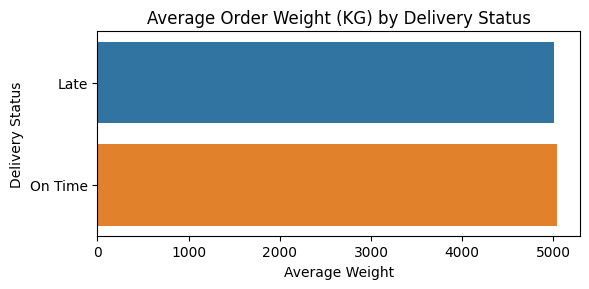

In [213]:
plt.figure(figsize=(6,3))
sns.barplot(data=delivery_weights, x='average_weight', y='Delivery_Status', palette="tab10")

plt.title("Average Order Weight (KG) by Delivery Status")
plt.tight_layout()
plt.ylabel("Delivery Status")
plt.xlabel("Average Weight")
plt.show()

### **TRANSPORTATION ANALYSIS**

In [214]:
# Breakdown of transport method by on time and late deliveries
on_time_deliveries = df[df['Delivery_Status'] == 'On Time']
on_time_transport = on_time_deliveries['Transportation_Mode'].value_counts()
late_transport = late_deliveries['Transportation_Mode'].value_counts()

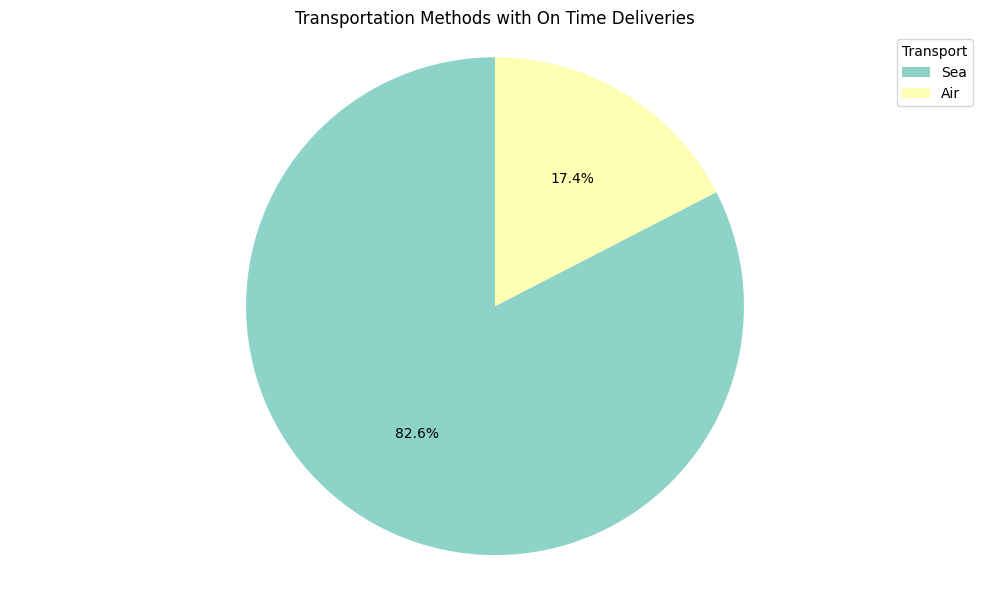

In [215]:
plt.figure(figsize=(10,6))
plt.pie(
    on_time_transport,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors
)
plt.title('Transportation Methods with On Time Deliveries')
plt.axis('equal')
plt.legend(on_time_transport.index,
          title="Transport",
          loc='best')
plt.tight_layout()
plt.show()

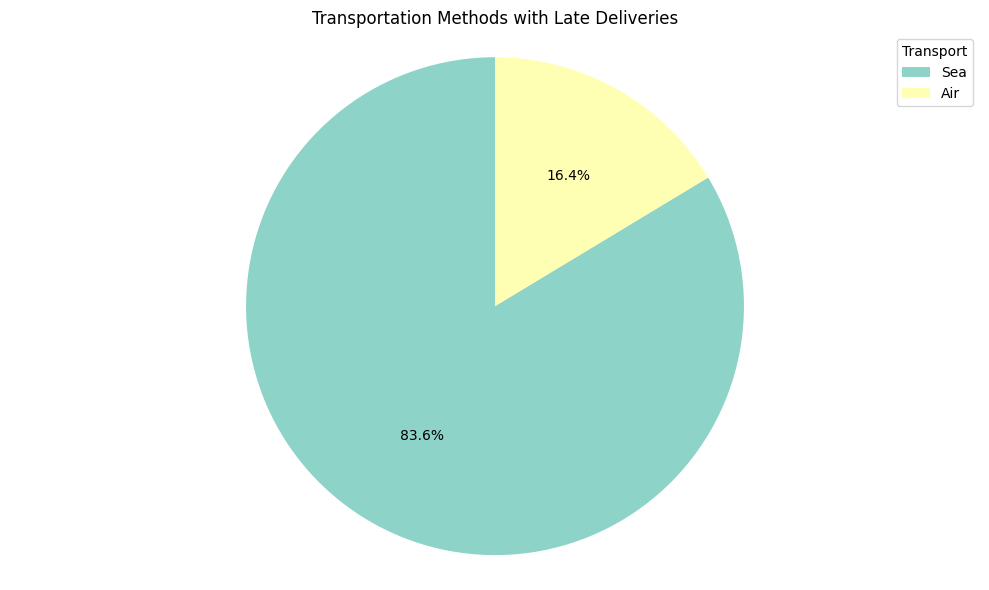

In [216]:
plt.figure(figsize=(10,6))
plt.pie(
    late_transport,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors
)
plt.title('Transportation Methods with Late Deliveries')
plt.axis('equal')
plt.legend(late_transport.index,
          title="Transport",
          loc='best')
plt.tight_layout()
plt.show()

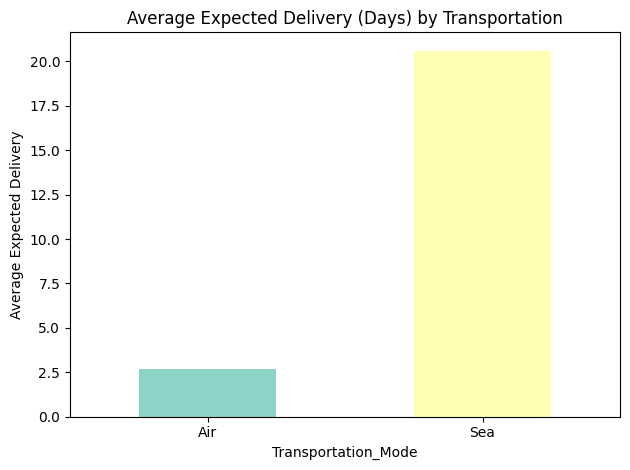

In [217]:
# Average expected delivery by transportation

df.groupby("Transportation_Mode")['Base_Lead_Time_Days'].mean().plot(kind='bar', color=plt.cm.Set3.colors)

plt.title("Average Expected Delivery (Days) by Transportation")
plt.xticks(rotation=0)
plt.ylabel("Average Expected Delivery")
plt.tight_layout()
plt.show()

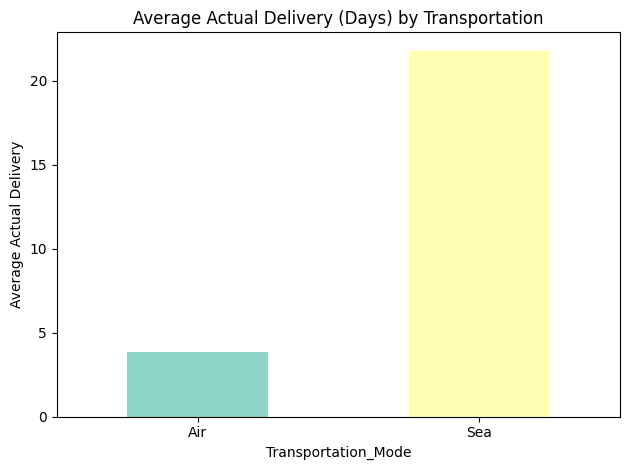

In [218]:
# Average actual delivery by transportation

df.groupby("Transportation_Mode")['Actual_Lead_Time_Days'].mean().plot(kind='bar', color=plt.cm.Set3.colors)

plt.title("Average Actual Delivery (Days) by Transportation")
plt.xticks(rotation=0)
plt.ylabel("Average Actual Delivery")
plt.tight_layout()
plt.show()

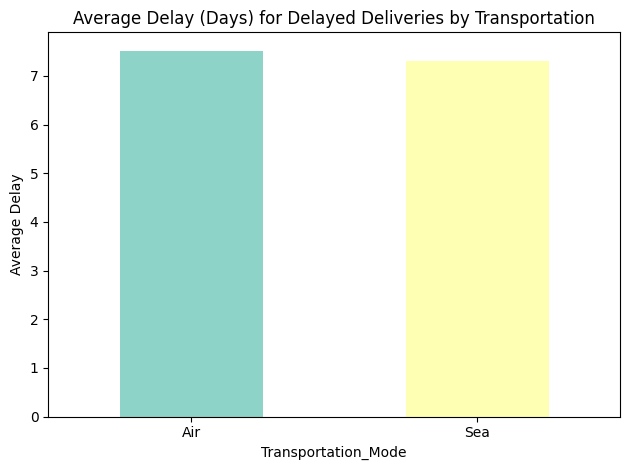

In [219]:
# Average delay by transportation

delayed_deliveries = df[df['Delay_Days'] != 0]

delayed_deliveries.groupby("Transportation_Mode")['Delay_Days'].mean().plot(kind='bar', color=plt.cm.Set3.colors)

plt.title("Average Delay (Days) for Delayed Deliveries by Transportation")
plt.xticks(rotation=0)
plt.ylabel("Average Delay")
plt.tight_layout()
plt.show()

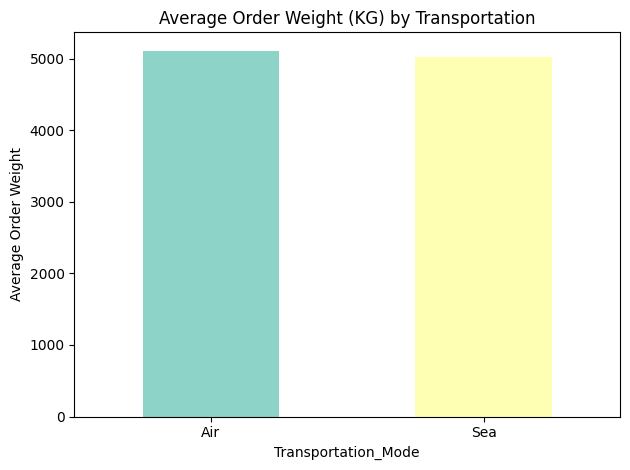

In [220]:
df.groupby("Transportation_Mode")['Order_Weight_Kg'].mean().plot(kind='bar', color=plt.cm.Set3.colors)

plt.title("Average Order Weight (KG) by Transportation")
plt.xticks(rotation=0)
plt.ylabel("Average Order Weight")
plt.tight_layout()
plt.show()

### **PRODUCTS ANALYSIS**

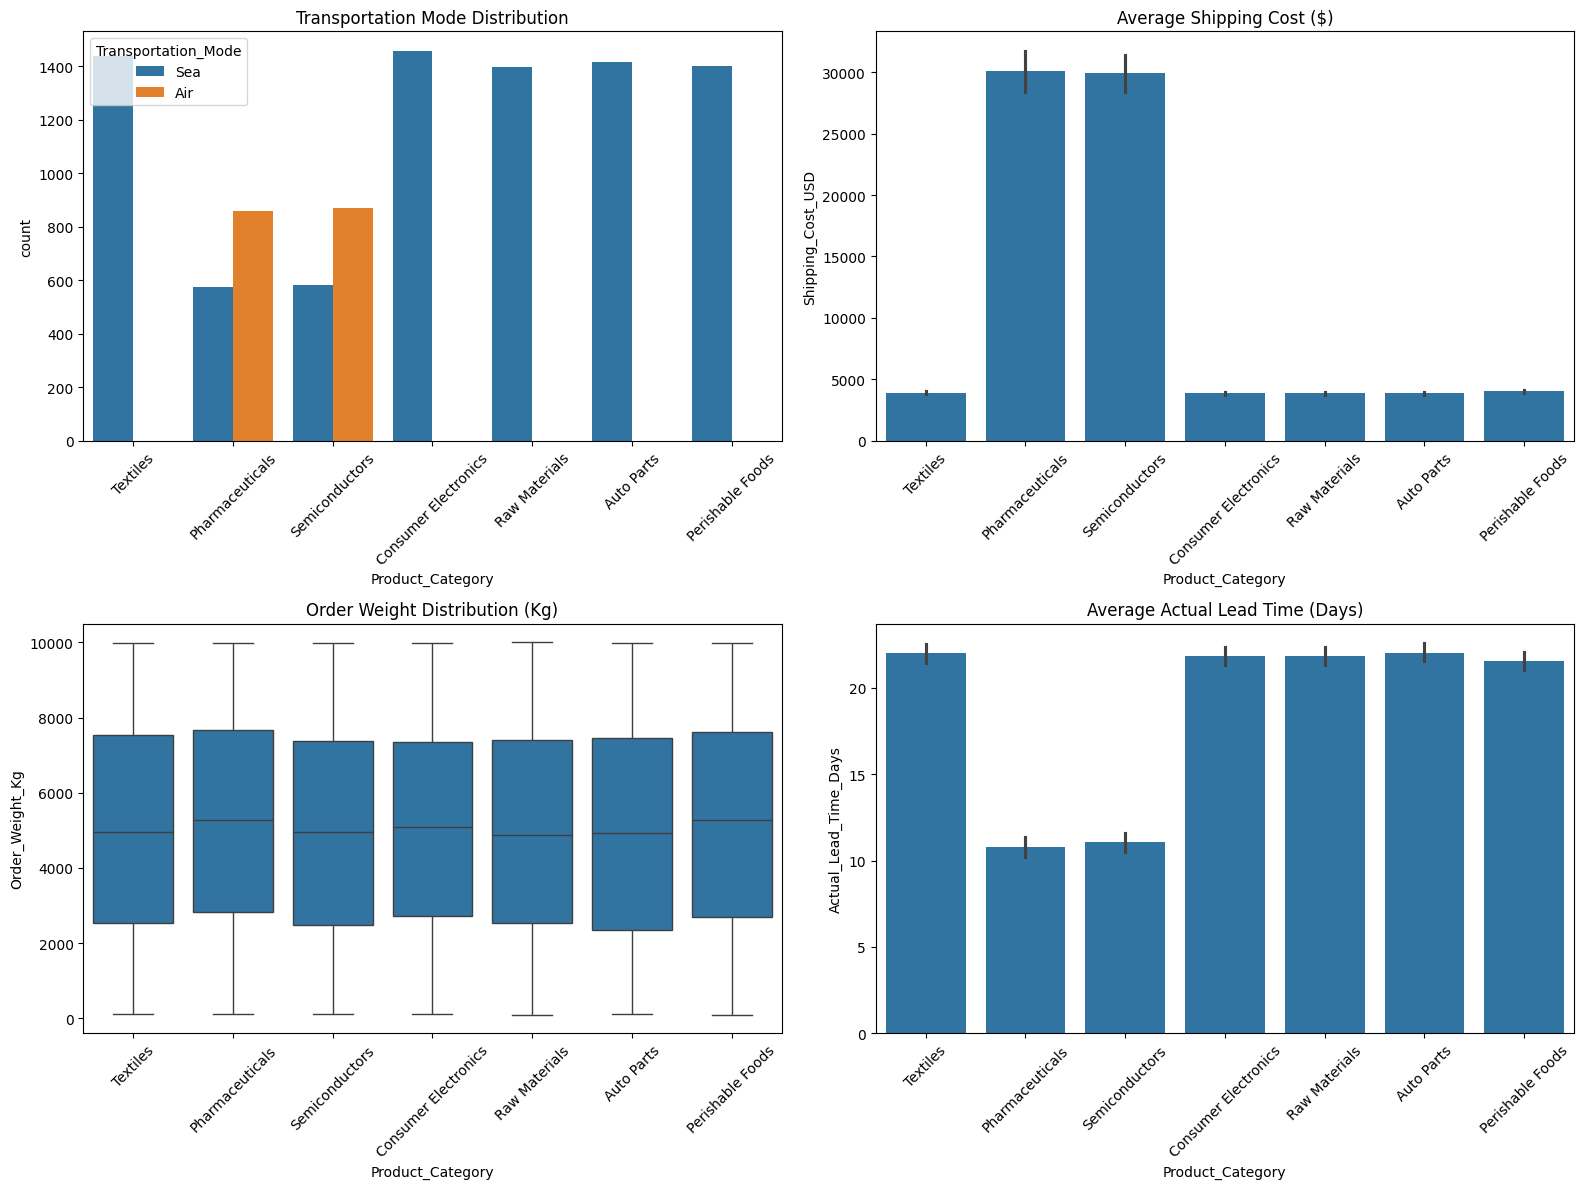

In [221]:
# 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# No looping through as each plot will utilise a different graphing type

# Plot 1: Transportation Mode (Countplot with Hue)
sns.countplot(data=df, x='Product_Category', hue='Transportation_Mode', ax=axes[0, 0])
axes[0, 0].set_title('Transportation Mode Distribution')

# Plot 2: Shipping Cost (Barplot - Average Cost)
sns.barplot(data=df, x='Product_Category', y='Shipping_Cost_USD', ax=axes[0, 1])
axes[0, 1].set_title('Average Shipping Cost ($)')

# Plot 3: Order Weight (Boxplot - Distribution of Weights)
sns.boxplot(data=df, x='Product_Category', y='Order_Weight_Kg', ax=axes[1, 0])
axes[1, 0].set_title('Order Weight Distribution (Kg)')

# Plot 4: Lead Time (Barplot - Actual Lead Time)
sns.barplot(data=df, x='Product_Category', y='Actual_Lead_Time_Days', ax=axes[1, 1])
axes[1, 1].set_title('Average Actual Lead Time (Days)')

# Rotate x-labels for all plots to prevent overlap
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


### **GEOGRAPHIC ANALYSIS**

In [222]:
df['Origin_City'].unique().tolist()


['Shanghai, CN',
 'Tokyo, JP',
 'Shenzhen, CN',
 'Santos, BR',
 'Hamburg, DE',
 'Mumbai, IN']

In [223]:
df['Destination_City'].unique().tolist()

['Los Angeles, US',
 'Singapore, SG',
 'Rotterdam, NL',
 'Shanghai, CN',
 'New York, US',
 'Felixstowe, UK']

In [224]:
# Top 6 routes
top_origin = df['Origin_City'].value_counts().nlargest(6)
top_dest = df['Destination_City'].value_counts().nlargest(6)

Text(0, 0.5, 'Number of Shipments')

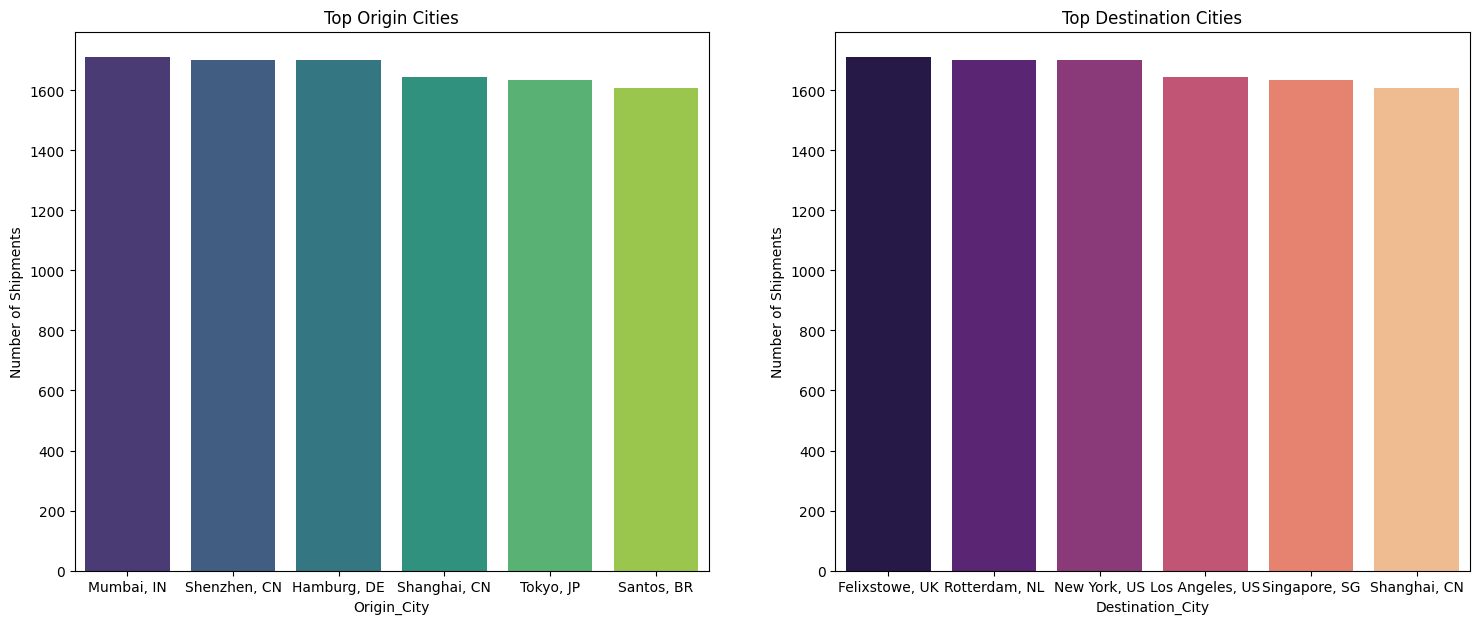

In [225]:
fig, axes = plt.subplots(1, 2, figsize=(18,7))

# Top Origins
sns.barplot(x=top_origin.index, y=top_origin.values, ax=axes[0], palette='viridis')
axes[0].set_title('Top Origin Cities')
axes[0].set_ylabel('Number of Shipments')

# Top Destinations
sns.barplot(x=top_dest.index, y=top_dest.values, ax=axes[1], palette='magma')
axes[1].set_title('Top Destination Cities')
axes[1].set_ylabel('Number of Shipments')

In [226]:
# Origin routes
top_avg_delays = df.groupby('Origin_City')['Delay_Days'].mean().sort_values(ascending=True)

# Calculate the order: count the values and sort them ascending (lowest to highest)
common_routes= df['Route_Type'].value_counts(ascending=True).index

Text(0.5, 0, 'Number of Shipments')

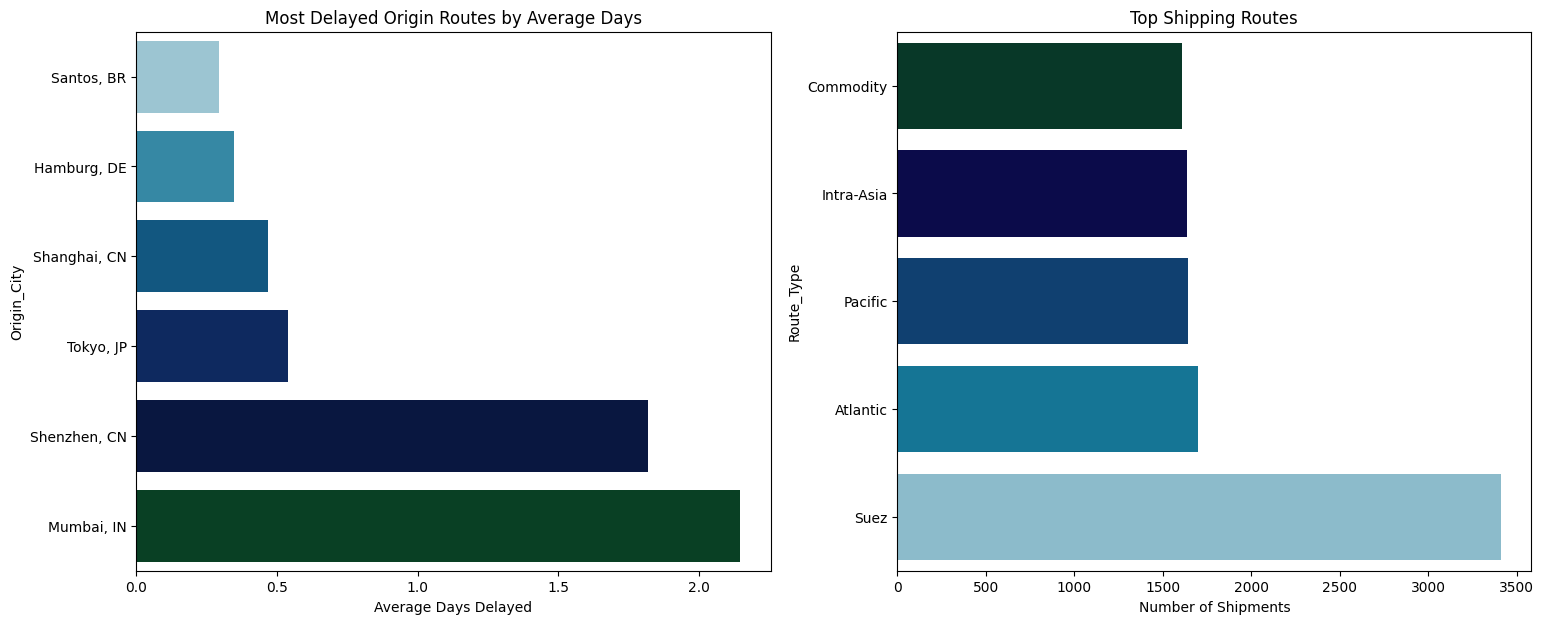

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(18,7))

# Most Delayed Origin Routes
sns.barplot(x=top_avg_delays.values, y=top_avg_delays.index, ax=axes[0], palette='ocean_r')
axes[0].set_title('Most Delayed Origin Routes by Average Days')
axes[0].set_xlabel('Average Days Delayed')

# Common Shipping Routes
sns.countplot(data=df, y='Route_Type', palette='ocean', ax=axes[1], order=common_routes)
axes[1].set_title('Top Shipping Routes')
axes[1].set_xlabel('Number of Shipments')

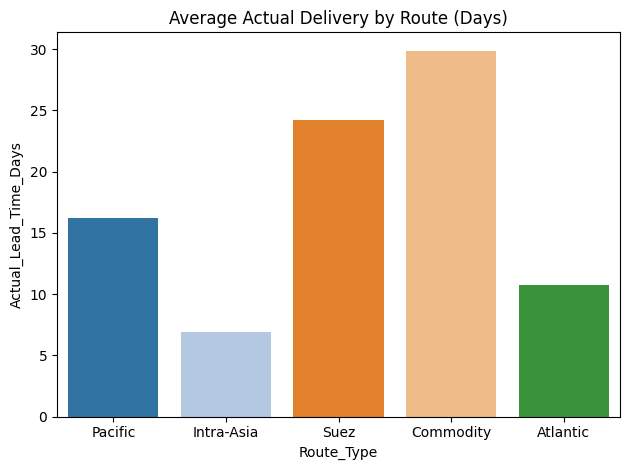

In [228]:
sns.barplot(data=df, x='Route_Type', y='Actual_Lead_Time_Days', errorbar=None, palette="tab20")

plt.title('Average Actual Delivery by Route (Days)')
plt.tight_layout()

#### **ASSESING GEOPOLITICAL RISK**

<Axes: title={'center': 'Relationship between Geopolitical Risk & Days Delayed (Averaged)'}, xlabel='Geopolitical_Risk_Index', ylabel='Delay_Days'>

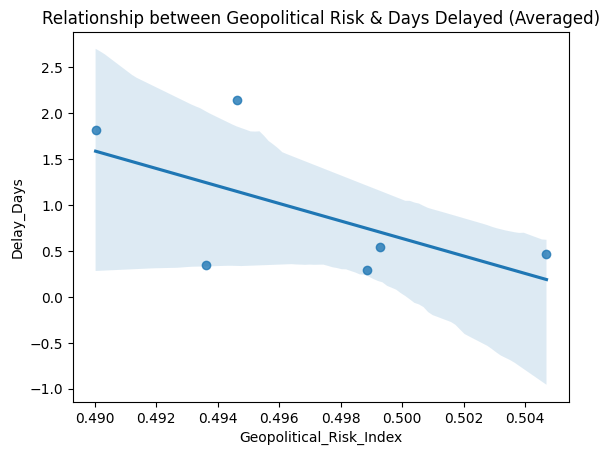

In [229]:
# OriCities

city_stats = df.groupby('Destination_City').agg({
    'Geopolitical_Risk_Index': 'mean',
    'Delay_Days': 'mean'
})

plt.title("Relationship between Geopolitical Risk & Days Delayed (Averaged)")
sns.regplot(data=city_stats, x='Geopolitical_Risk_Index', y='Delay_Days')

***Average** Delay Days helps measure **efficiency**.*

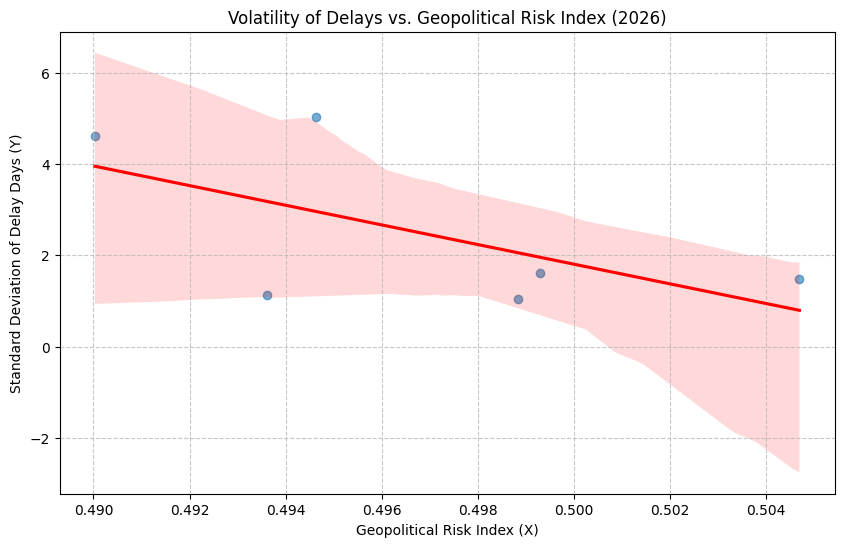

In [230]:
# 1. Aggregate to find mean Risk (X) and Std Dev of Delays (Y)
risk_volatility = df.groupby('Origin_City').agg({
    'Geopolitical_Risk_Index': 'mean',
    'Delay_Days': 'std'
})

# 2. Create the scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=risk_volatility, x='Geopolitical_Risk_Index', y='Delay_Days', 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('Volatility of Delays vs. Geopolitical Risk Index (2026)')
plt.xlabel('Geopolitical Risk Index (X)')
plt.ylabel('Standard Deviation of Delay Days (Y)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


***Std Dev** of Delay Days helps measure **Reliability (Volatility)**.*


### **FINANCIAL ANALYSIS**

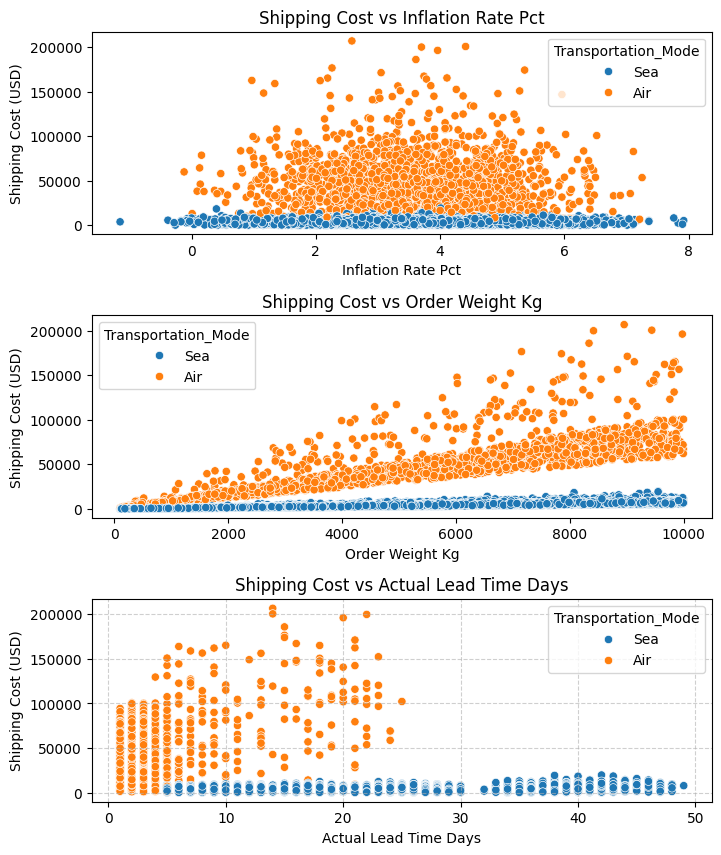

In [231]:
ship_cost_columns = ['Inflation_Rate_Pct', 'Order_Weight_Kg', 'Actual_Lead_Time_Days']

# Create a 2x2 grid
fig, axs = plt.subplots(3, 1, figsize=(8,10))
axs = axs.flatten()  # Flatten the 2D array into 1D for easy iteration



# Use enumerate to get both index and column name
for i, col in enumerate(ship_cost_columns):
    sns.scatterplot(
        data=df, 
        x=col,
        y='Shipping_Cost_USD',
        hue='Transportation_Mode',
        ax=axs[i]           # Use the flattened axs array
    )
    
    axs[i].set_title(f'Shipping Cost vs {col.replace("_", " ")}')
    axs[i].set_xlabel(f"{col.replace("_", " ")}")
    axs[i].set_ylabel("Shipping Cost (USD)")

plt.grid(True, linestyle='--', alpha=0.6)

# Increase hspace (height space) to prevent overlap
# A value of 0.4 to 0.6 is usually perfect for vertical grids
plt.subplots_adjust(hspace=0.4) 
plt.show()

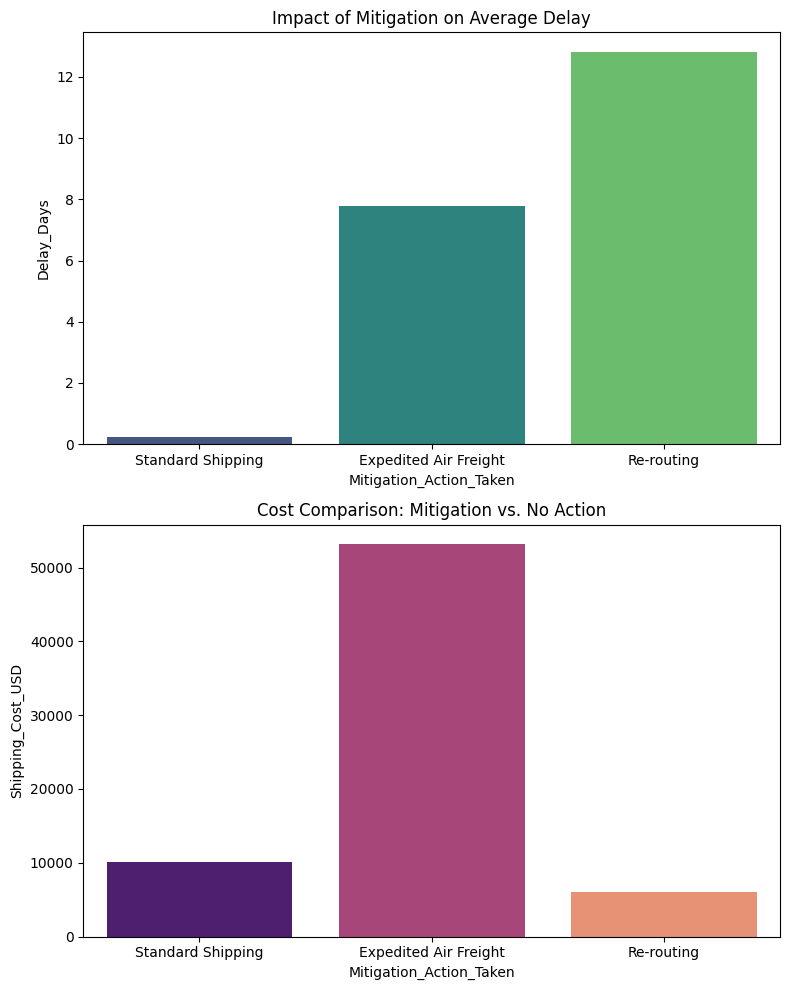

In [232]:

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot A: Does mitigation reduce delays?
sns.barplot(data=df, x='Mitigation_Action_Taken', y='Delay_Days', ax=axes[0], errorbar=None, palette='viridis')
axes[0].set_title('Impact of Mitigation on Average Delay')

# Plot B: What is the cost of taking that action?
sns.barplot(data=df, x='Mitigation_Action_Taken', y='Shipping_Cost_USD', ax=axes[1], errorbar=None, palette='magma')
axes[1].set_title('Cost Comparison: Mitigation vs. No Action')

plt.tight_layout()
plt.show()


#### **Inflation-Lag Analysis**

*The **inflation lag in shipping** refers to the time delay between a significant macroeconomic event, in turn impacting global inflation rate (driven by factors like fuel and labour costs) and the resulting adjustment in the price of shipping goods.*

In [233]:
# Create Monthly periods for our orders, using the order_date column 

df['Year_Month'] = df['Order_Date'].dt.to_period('M').astype(str)

# Obtain monthly averages of our order dates 

monthly_stats = df.groupby('Year_Month').agg({
    'Shipping_Cost_USD': 'mean',
    'Inflation_Rate_Pct': 'mean'
}).reset_index()

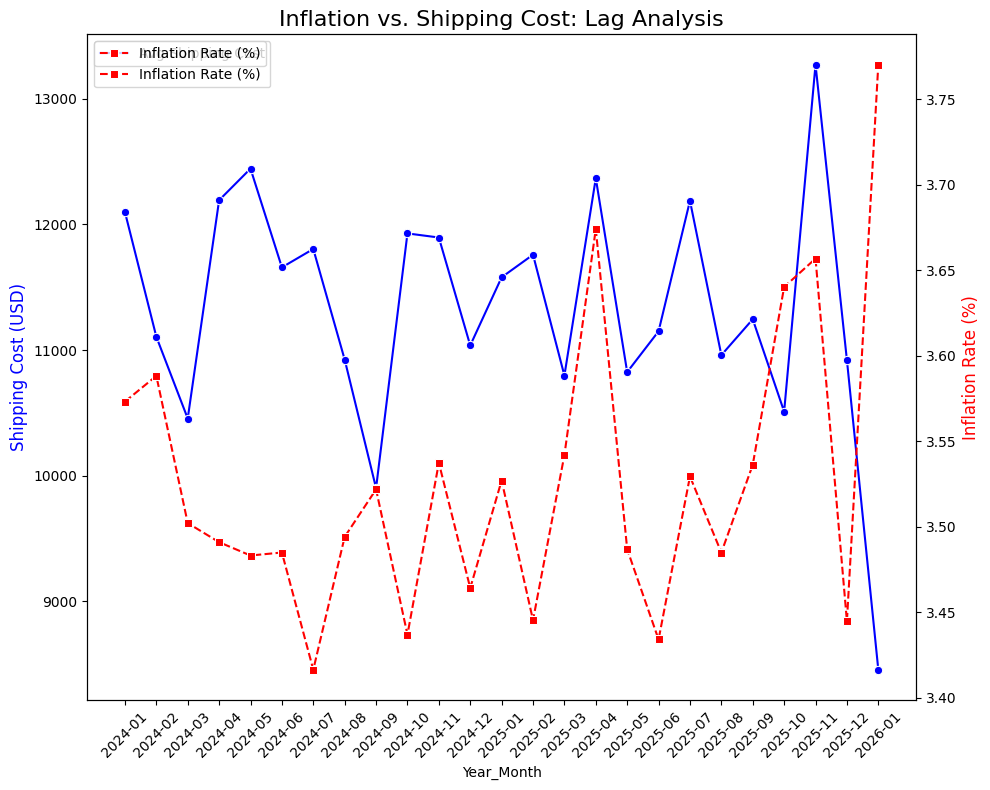

In [256]:
fig, ax1 = plt.subplots(figsize=(10, 8))

# Axis 1: Shipping Cost (Line)
sns.lineplot(data=monthly_stats, x='Year_Month', y='Shipping_Cost_USD', 
             ax=ax1, color='blue', marker='o', label='Avg Shipping Cost')
ax1.set_ylabel('Shipping Cost (USD)', color='blue', fontsize=12)

# Create a second axis for Inflation
ax2 = ax1.twinx()
sns.lineplot(data=monthly_stats, x='Year_Month', y='Inflation_Rate_Pct', 
             ax=ax2, color='red', linestyle='--', marker='s', label='Inflation Rate (%)')
ax2.set_ylabel('Inflation Rate (%)', color='red', fontsize=12)

# --- MERGE LEGENDS HERE ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Inflation vs. Shipping Cost: Lag Analysis', fontsize=16)
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


                        


*Based on global, historical data, the lag typically lasts between **three and six months**. For example, a spike in fuel prices occuring in January would not reflect in an average freight invoice until April and May.*

*Global Inflation Rate % reacts to the change in Shipping Costs roughly 3 to 6 months consistently in 2024, indicating the **Inflation Lag** phenomena. However the following year there is a strong postive correlation with the lines pairing up in terms of shape. This indicates **zero lag**.*

*At beginning of 2026, a divergence occured where shipping costs plumetted and inflation rate accelerated.*

- Primarily due to **time lag**. The spike observed in January 2026 inflation rate is likely the delayed reaction to the previous major spike in shipping costs from October/November 2025.

- The second is **Current Market Decoupling**:

    - The shipping industry is suffering from **massive structural overcapacity (too many ships)**. Fierce competition is forcing carriers to drop prices for new bookings in early 2026, therefore costs are down
      
    -  The general economy's inflation is still driven by persistent high costs in other sectors like **labor, energy, and services** which are not benefiting from shipping oversupply.

  

## **CORRELATIONS**

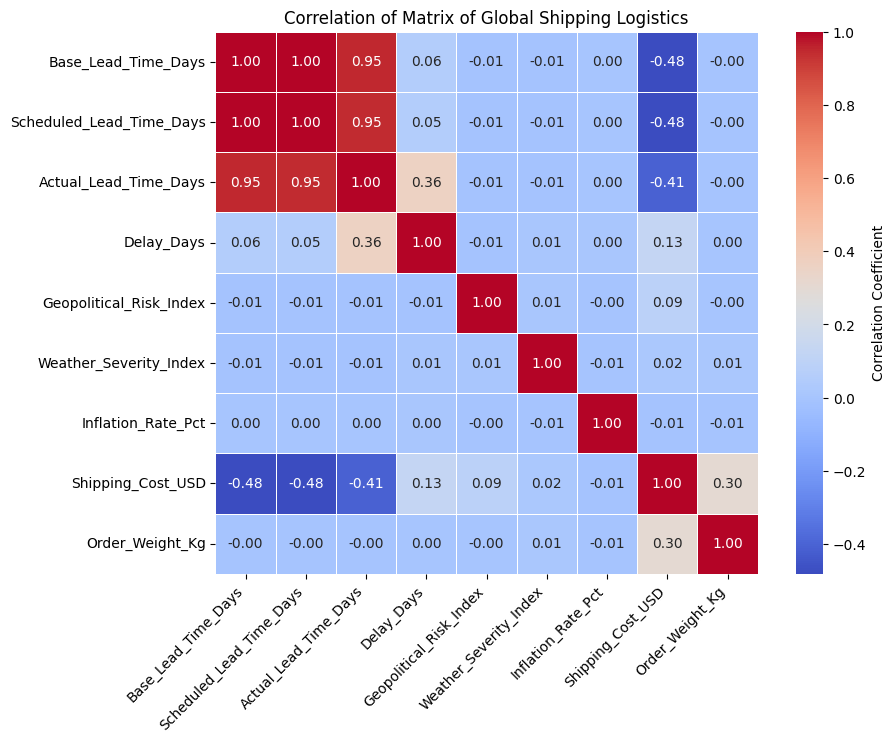

In [254]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Correlation of Matrix of Global Shipping Logistics")
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()